DATA PREPROCESSING

In [1]:
import csv
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re

## Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

def preprocess_text(text):
    """Clean, tokenize, remove stopwords, and stem the input text."""
    if not text:
        return ""
    # Remove punctuation and special chars
    text = re.sub(r"[^\w\s]", "", text)
    words = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]

    preprocessed_text = ' '.join(words)
    return preprocessed_text


def read_data_from_csv(input_filename):
    """Read ALL rows from CSV without any limit."""
    data = []
    try:
        csvfile = open(input_filename, 'r', encoding='utf-8')
        reader = csv.reader(csvfile)
        header = next(reader)
    except UnicodeDecodeError:
        csvfile = open(input_filename, 'r', encoding='latin1')
        reader = csv.reader(csvfile)
        header = next(reader)

    # Read ALL rows
    for row in reader:
        row_dict = {}
        for i, val in enumerate(row):
            row_dict[header[i]] = val
        data.append(row_dict)

    csvfile.close()
    return data


def write_data_to_csv(output_filename, data):
    """Write preprocessed data to CSV."""
    with open(output_filename, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['textID', 'preprocessed_text'])
        for row in data:
            writer.writerow([row['textID'], row['preprocessed_text']])


# Read all rows from dataset
input_data = read_data_from_csv('test.csv')

output_data = []
for row in input_data:
    text_id = row.get('textID', 'Unknown')
    preprocessed_text = preprocess_text(row.get('text', ''))

    found = False
    for i in range(len(output_data)):
        if text_id.lower() == output_data[i]['textID'].lower():
            output_data[i]['preprocessed_text'] += '\n' + preprocessed_text
            found = True
            break

    if not found:
        output_data.append({'textID': text_id, 'preprocessed_text': preprocessed_text})

# Write the processed output to new file
write_data_to_csv('preprocessed_statements.csv', output_data)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Data Visualization ofTraining Dataset

Basic Statistics:
              Age    openness  neuroticism  conscientiousness  agreeableness  \
count  709.000000  709.000000   709.000000         709.000000     709.000000   
mean    19.685472    5.019746     4.647391           4.643159       4.827927   
std      2.510672    1.519052     1.658673           1.703569       1.632564   
min      5.000000    1.000000     1.000000           1.000000       1.000000   
25%     18.000000    4.000000     4.000000           3.000000       4.000000   
50%     19.000000    5.000000     5.000000           5.000000       5.000000   
75%     21.000000    6.000000     6.000000           6.000000       6.000000   
max     28.000000    8.000000     8.000000           8.000000       8.000000   

       extraversion  
count    709.000000  
mean       4.409027  
std        1.567404  
min        1.000000  
25%        3.000000  
50%        5.000000  
75%        6.000000  
max        7.000000  

First Few Rows:
   Gender  Age  openness  neuroticism  conscie

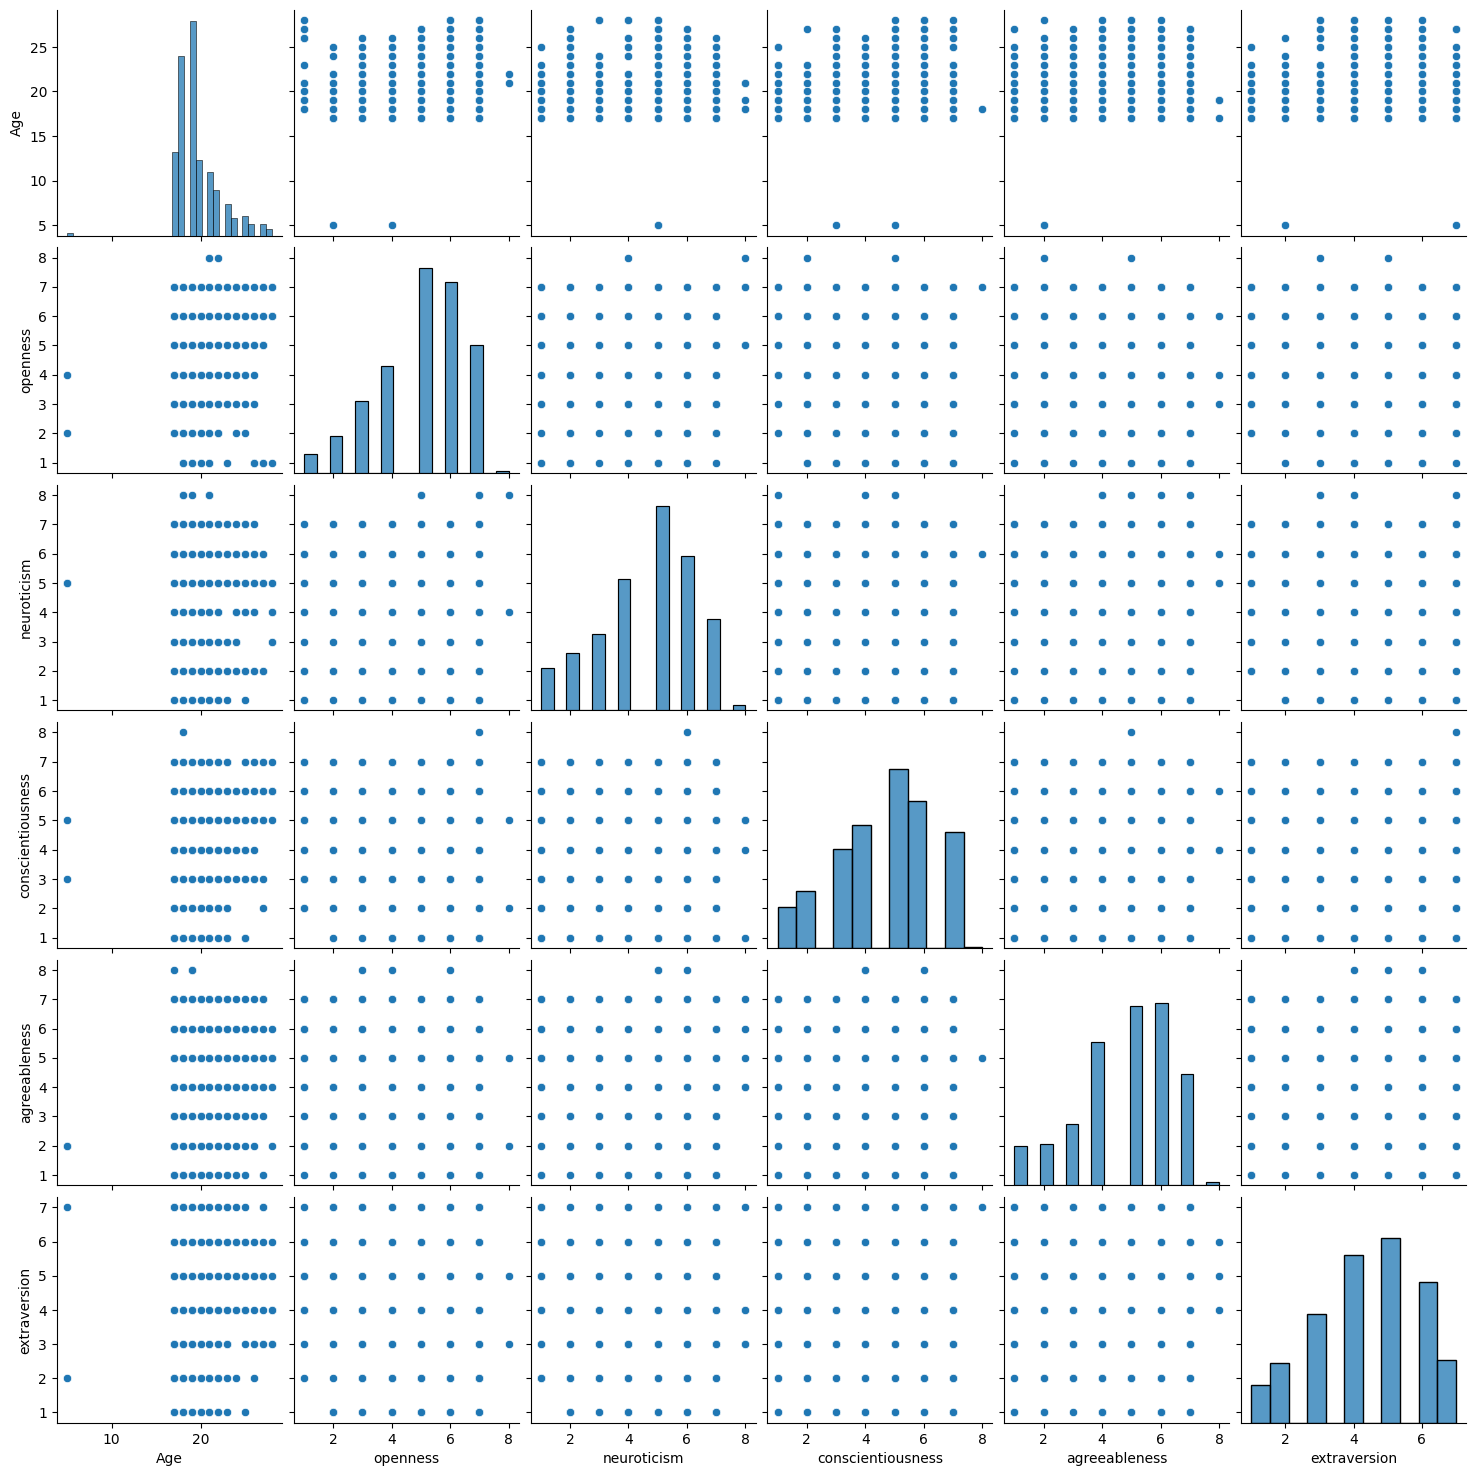

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset from the CSV file
df = pd.read_csv('train.csv')

# Display basic statistics of the dataset
print("Basic Statistics:")
print(df.describe())

# Display the first few rows of the dataset
print("\nFirst Few Rows:")
print(df.head())

# Pairplot for numerical variables
sns.pairplot(df[['Age', 'openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']])
plt.show()



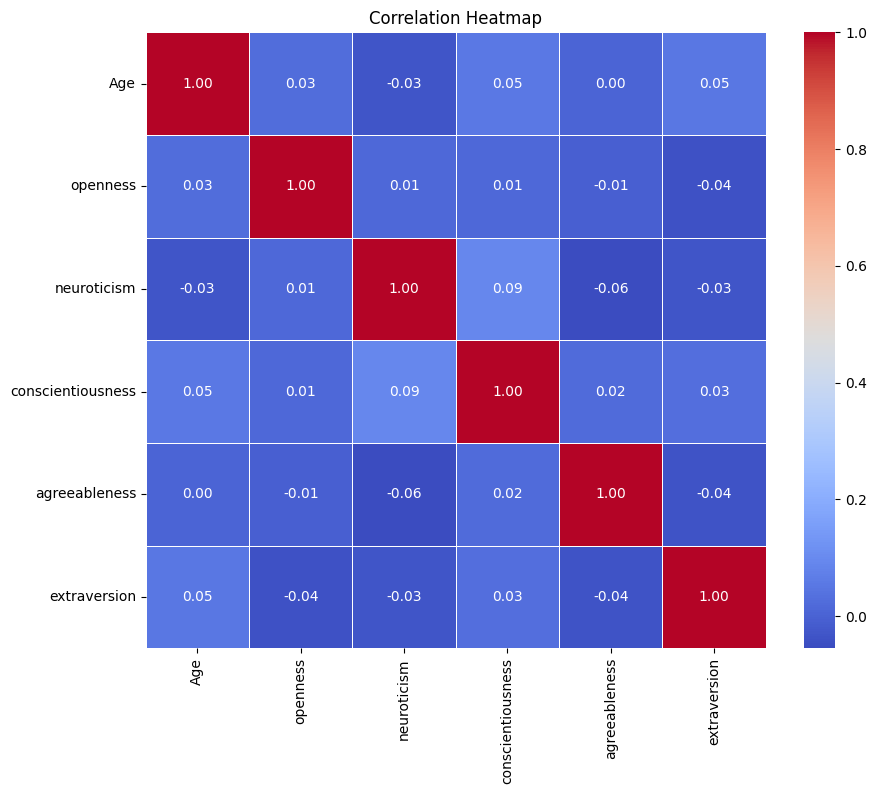

In [4]:
# Correlation heatmap
correlation_matrix = df[['Age', 'openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

#OBSERVATION
#All correlations between the Big Five traits are between –0.06 and +0.09
#Age has almost no correlation with any personality trait Age → Openness: 0.03 Age → Conscientiousness: 0.05
#Weak positive correlations Neuroticism ↔ Conscientiousness: 0.09 Conscientiousness ↔ Extraversion: 0.03
#Weak negative correlations Openness ↔ Extraversion: –0.04 Agreeableness ↔ Neuroticism: –0.06

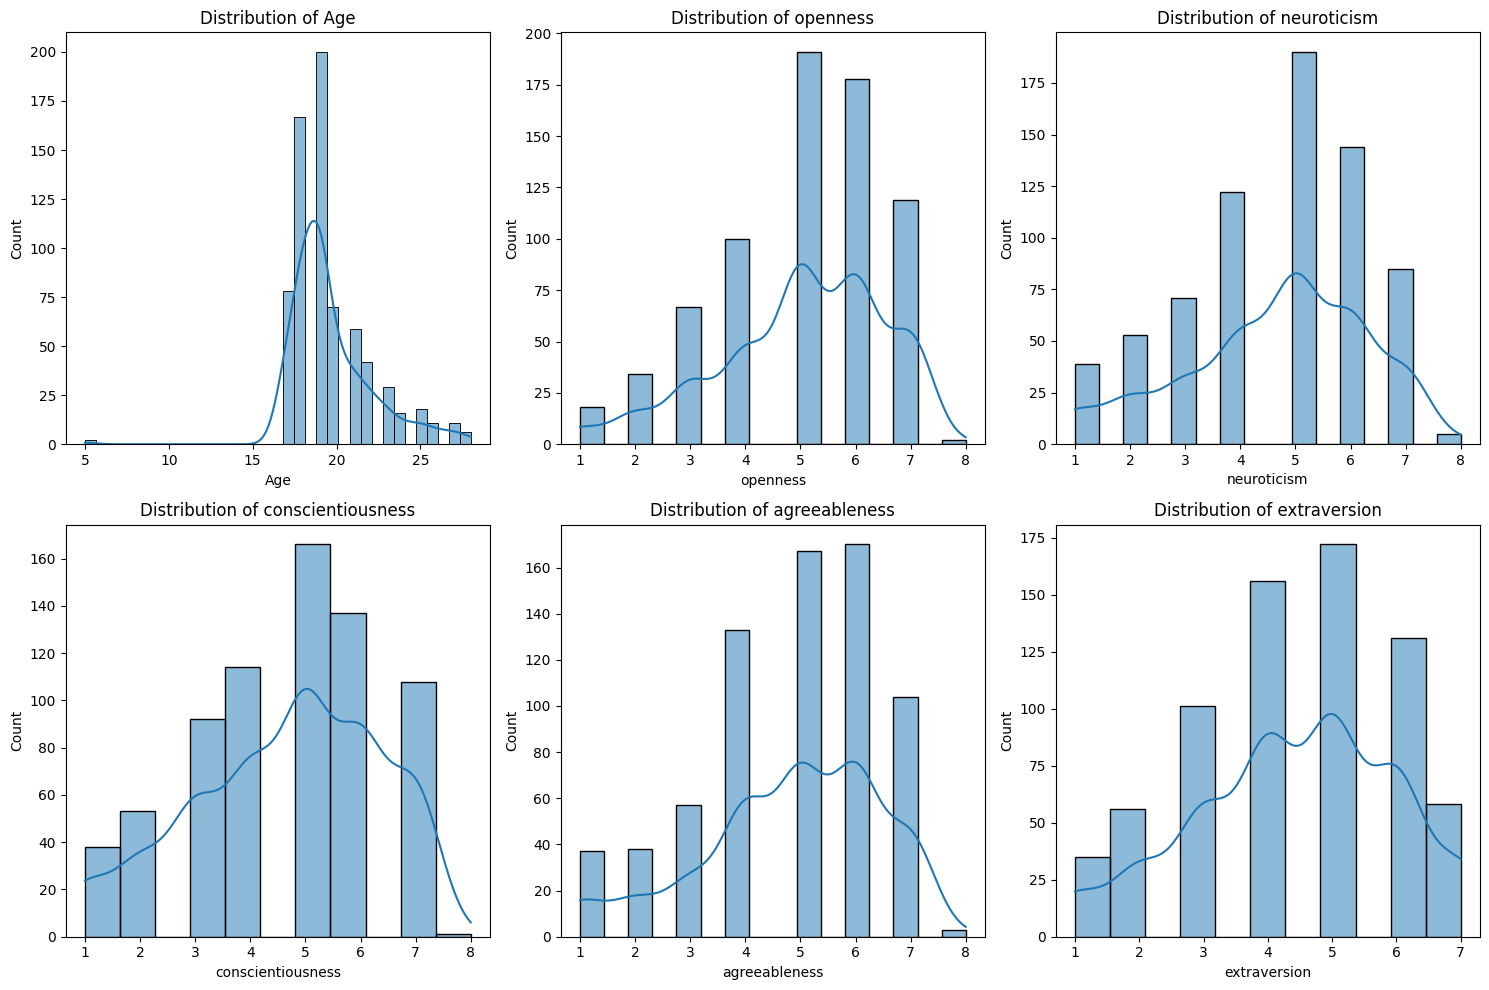

In [5]:
# Distribution plots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Age', 'openness', 'neuroticism', 'conscientiousness', 'agreeableness', 'extraversion'], 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()
# MOST PEOPLE ARE BLW 17 AND 22
# ALMOST Openness scores mostly fall between 4 and 7.
#Most neuroticism scores are between 4 and 6.
#Extraversion scores are mostly between 3 and 6.

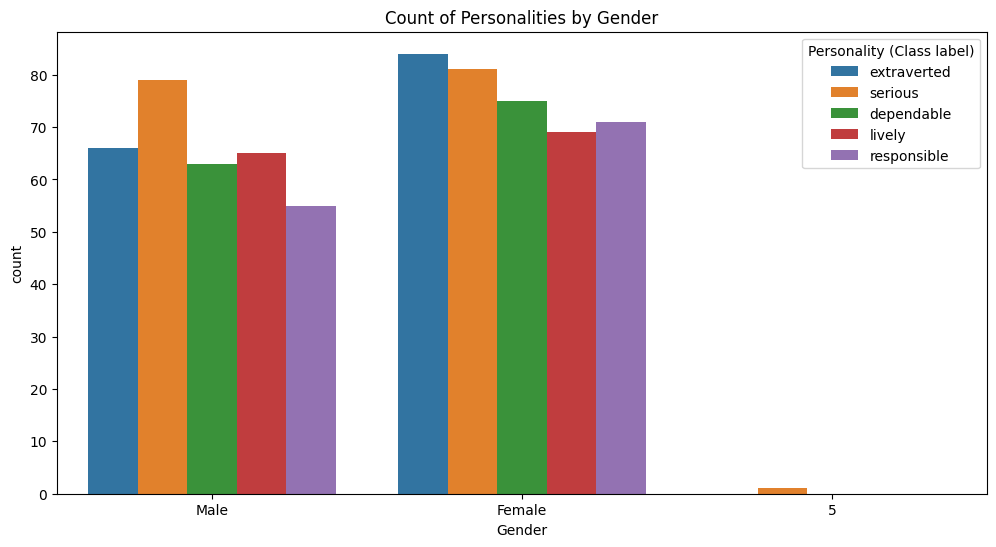

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Personality (Class label)', data=df)
plt.title('Count of Personalities by Gender')
plt.show()
# All personality types appear in both genders
#Females have slightly higher counts in every personality class


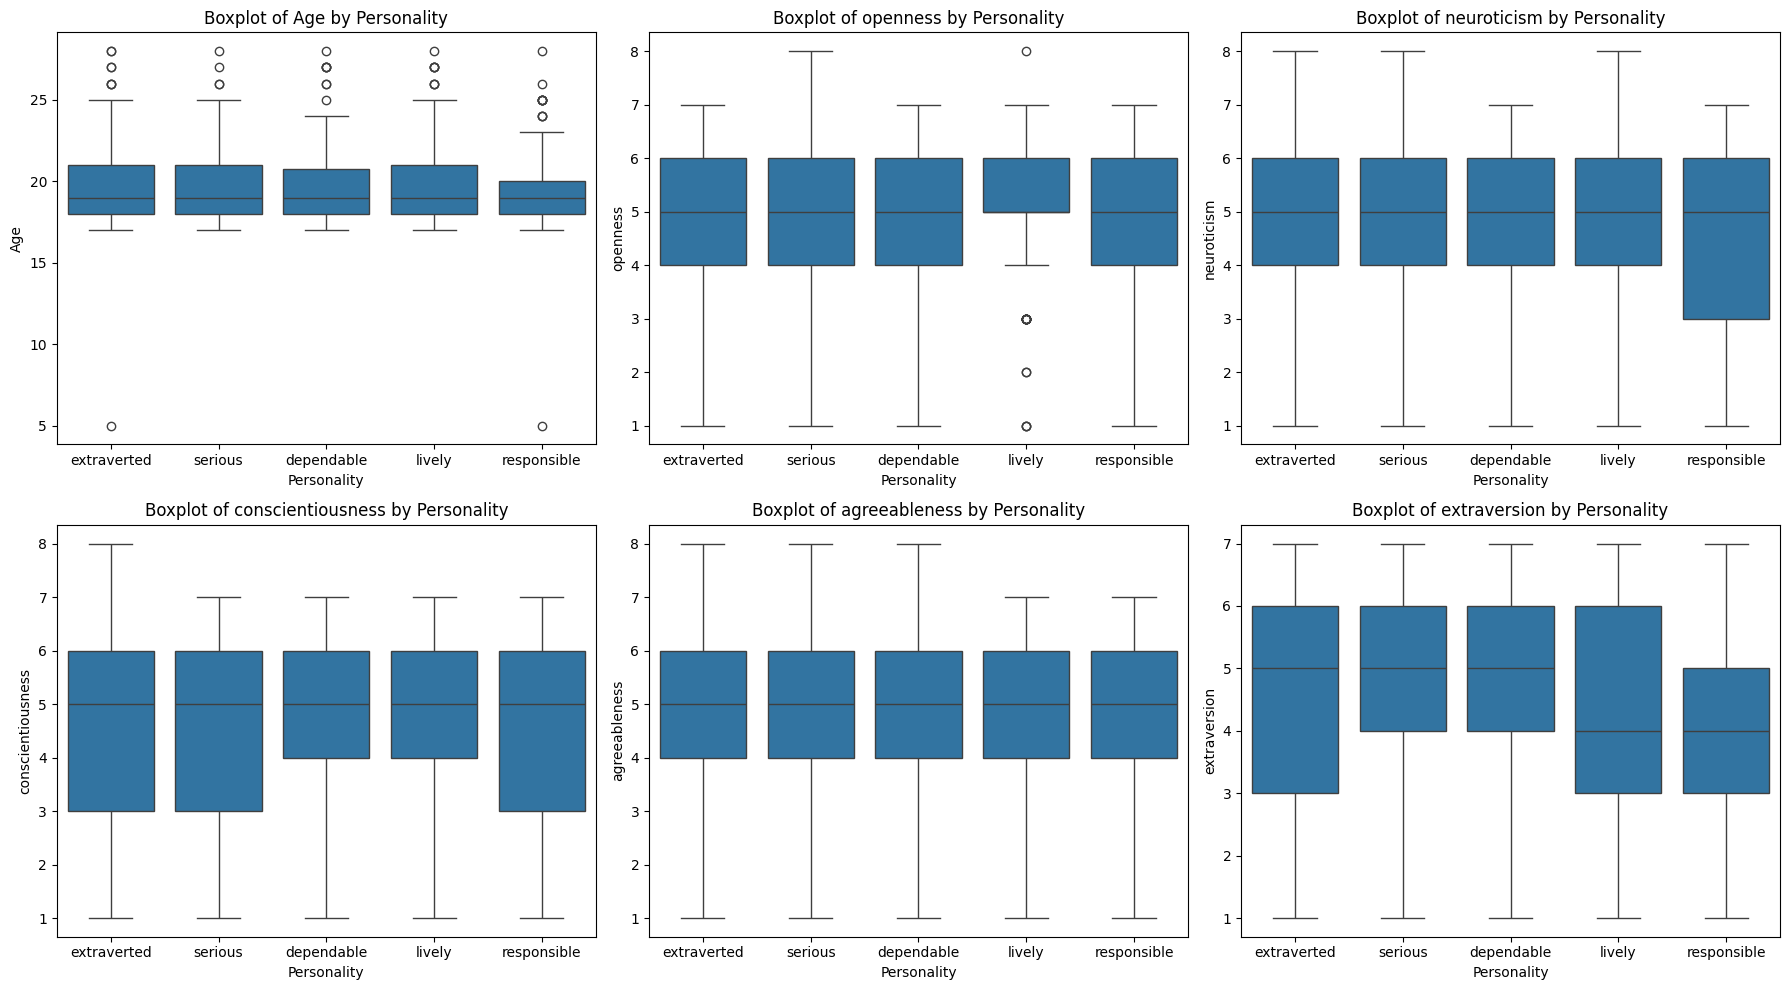

In [7]:
plt.figure(figsize=(18, 10))

for i, col in enumerate(['Age', 'openness', 'neuroticism',
                         'conscientiousness', 'agreeableness', 'extraversion'], 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Personality (Class label)', y=col, data=df)
    plt.title(f'Boxplot of {col} by Personality')
    plt.xlabel('Personality')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

#Personality type in this dataset is not strongly related to age.
#Openness is fairly similar across personality types, with small variations.
#Agreeableness is very similar across all personality categories.

**Features selection Extraction**



Ig

In [3]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile, mutual_info_classif

def process_single_data(input_row):
    preprocessed_text = input_row['preprocessed_text']

    # Handle empty preprocessed text to prevent ValueError
    if not preprocessed_text.strip():
        return []

    vectorizer = CountVectorizer()
    try:
        features = vectorizer.fit_transform([preprocessed_text])
        selected_feature_names = vectorizer.get_feature_names_out()
        return selected_feature_names
    except ValueError as e:
        # Catch 'empty vocabulary' error specifically and return an empty list
        if "empty vocabulary" in str(e):
            return []
        else:
            # Re-raise other ValueErrors if they occur
            raise

def read_data_from_csv(input_filename):
    data = []
    with open(input_filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)
        for row in reader:
            row_dict = {}
            for i, val in enumerate(row):
                row_dict[header[i]] = val
            data.append(row_dict)
    return data

input_data = read_data_from_csv('preprocessed_statements.csv')
with open('information_gain.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['textID', 'information_gain_features'])
    for row in input_data:
        selected_feature_names = process_single_data(row)
        writer.writerow([row['textID'], ' '.join(selected_feature_names)])

Chi Squared Test

In [4]:
import csv
from sklearn.feature_extraction.text import CountVectorizer

def process_single_data(input_row):
    preprocessed_text = input_row['preprocessed_text']

    # Handle empty preprocessed text to prevent ValueError
    if not preprocessed_text.strip():
        return []

    vectorizer = CountVectorizer()
    try:
        features = vectorizer.fit_transform([preprocessed_text])
        selected_feature_names = vectorizer.get_feature_names_out()
        return selected_feature_names
    except ValueError as e:
        # Catch 'empty vocabulary' error specifically and return an empty list
        if "empty vocabulary" in str(e):
            return []
        else:
            # Re-raise other ValueErrors if they occur
            raise

def read_data_from_csv(input_filename):
    data = []
    with open(input_filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)
        for row in reader:
            row_dict = {}
            for i, val in enumerate(row):
                row_dict[header[i]] = val
            data.append(row_dict)
    return data

input_data = read_data_from_csv('preprocessed_statements.csv')

with open('chi_squared.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['textID', 'chi_squared_features']) # Corrected 'Leader' to 'textID'
    for row in input_data:
        selected_feature_names = process_single_data(row)
        writer.writerow([row['textID'], ' '.join(selected_feature_names)]) # Corrected 'Leader' to 'textID']

  Pcc

In [5]:
import csv
from sklearn.feature_extraction.text import CountVectorizer


def process_single_data(input_row):
    preprocessed_text = input_row['preprocessed_text']

    # Handle cases where preprocessed_text is empty or only whitespace
    if not preprocessed_text or not preprocessed_text.strip():
        return []

    vectorizer = CountVectorizer()
    try:
        features = vectorizer.fit_transform([preprocessed_text])
        feature_names = vectorizer.get_feature_names_out()
    except ValueError as e:
        # Catch 'empty vocabulary' error specifically and return an empty list
        if "empty vocabulary" in str(e):
            return []
        else:
            # Re-raise other ValueErrors if they occur
            raise

    # For a single document, statistical feature selection like f_classif is not meaningful
    # and causes RuntimeWarnings. We will simply return all extracted features.
    return list(feature_names)

def read_data_from_csv(input_filename):
    data = []
    with open(input_filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)
        for row in reader:
            row_dict = {}
            for i, val in enumerate(row):
                row_dict[header[i]] = val
            data.append(row_dict)
    return data

input_data = read_data_from_csv('preprocessed_statements.csv')

with open('pcc_features.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['textID', 'pcc_features'])
    for i in range(len(input_data)):
        row = input_data[i]
        selected_feature_names = process_single_data(row)
        writer.writerow([row['textID'], ' '.join(selected_feature_names)])

**Ocean scores**

Ig

In [6]:
import csv
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def compute_ocean_scores(text):
    sentiment = sid.polarity_scores(text)
    openness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10,1)
    conscientiousness_score = round(((sentiment['pos'] + sentiment['neg']) / 2) * 10, 1)
    extraversion_score = round(((sentiment['pos'] + sentiment['neg'] + 1) / 2) * 10, 1)
    agreeableness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10, 1)
    neuroticism_score = round(((sentiment['neg'] + 1 - sentiment['pos']) / 2) * 10, 1)
    return {
        'openness': openness_score,
        'conscientiousness': conscientiousness_score,
        'extraversion': extraversion_score,
        'agreeableness': agreeableness_score,
        'neuroticism': neuroticism_score
    }


def read_data_from_csv(mypersonality_final):
    data = []
    with open(mypersonality_final, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            data.append(row[1])
    return data

def write_output_to_csv(mypersonality_final, output_file):
    with open(mypersonality_final, 'r') as input_csvfile, open(output_file, 'w', newline='') as output_csvfile:
        reader = csv.reader(input_csvfile)
        writer = csv.writer(output_csvfile)
        writer.writerow(next(reader) + ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism'])
        for row in reader:
            text = row[1]
            ocean_scores = compute_ocean_scores(text)
            writer.writerow(row + [ocean_scores['openness'], ocean_scores['conscientiousness'], ocean_scores['extraversion'], ocean_scores['agreeableness'], ocean_scores['neuroticism']])


dataset = read_data_from_csv('information_gain.csv')
print(len(dataset))
for i in range(len(dataset)):
  compute_ocean_scores(dataset[i])
write_output_to_csv('information_gain.csv', 'IG_OCEAN_Scores.csv')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


3535


Chi

In [7]:
import csv
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def compute_ocean_scores(text):
    sentiment = sid.polarity_scores(text)
    openness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10,1)
    conscientiousness_score = round(((sentiment['pos'] + sentiment['neg']) / 2) * 10, 1)
    extraversion_score = round(((sentiment['pos'] + sentiment['neg'] + 1) / 2) * 10, 1)
    agreeableness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10, 1)
    neuroticism_score = round(((sentiment['neg'] + 1 - sentiment['pos']) / 2) * 10, 1)
    return {
        'openness': openness_score,
        'conscientiousness': conscientiousness_score,
        'extraversion': extraversion_score,
        'agreeableness': agreeableness_score,
        'neuroticism': neuroticism_score
    }


def read_data_from_csv(mypersonality_final):
    data = []
    with open(mypersonality_final, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            data.append(row[1])
    return data

def write_output_to_csv(mypersonality_final, output_file):
    with open(mypersonality_final, 'r') as input_csvfile, open(output_file, 'w', newline='') as output_csvfile:
        reader = csv.reader(input_csvfile)
        writer = csv.writer(output_csvfile)
        writer.writerow(next(reader) + ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism'])
        for row in reader:
            text = row[1]
            ocean_scores = compute_ocean_scores(text)
            writer.writerow(row + [ocean_scores['openness'], ocean_scores['conscientiousness'], ocean_scores['extraversion'], ocean_scores['agreeableness'], ocean_scores['neuroticism']])


dataset = read_data_from_csv('chi_squared.csv')
print(len(dataset))
for i in range(len(dataset)):
  compute_ocean_scores(dataset[i])
write_output_to_csv('chi_squared.csv', 'CS_OCEAN_Scores.csv')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


3535


Pcc

In [8]:
import csv
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

def compute_ocean_scores(text):
    sentiment = sid.polarity_scores(text)
    openness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10,1)
    conscientiousness_score = round(((sentiment['pos'] + sentiment['neg']) / 2) * 10, 1)
    extraversion_score = round(((sentiment['pos'] + sentiment['neg'] + 1) / 2) * 10, 1)
    agreeableness_score = round(((sentiment['pos'] + 1 - sentiment['neg']) / 2) * 10, 1)
    neuroticism_score = round(((sentiment['neg'] + 1 - sentiment['pos']) / 2) * 10, 1)
    return {
        'openness': openness_score,
        'conscientiousness': conscientiousness_score,
        'extraversion': extraversion_score,
        'agreeableness': agreeableness_score,
        'neuroticism': neuroticism_score
    }


def read_data_from_csv(mypersonality_final):
    data = []
    with open(mypersonality_final, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader)
        for row in reader:
            data.append(row[1])
    return data

def write_output_to_csv(mypersonality_final, output_file):
    with open(mypersonality_final, 'r') as input_csvfile, open(output_file, 'w', newline='') as output_csvfile:
        reader = csv.reader(input_csvfile)
        writer = csv.writer(output_csvfile)
        writer.writerow(next(reader) + ['openness', 'conscientiousness', 'extraversion', 'agreeableness', 'neuroticism'])
        for row in reader:
            text = row[1]
            ocean_scores = compute_ocean_scores(text)
            writer.writerow(row + [ocean_scores['openness'], ocean_scores['conscientiousness'], ocean_scores['extraversion'], ocean_scores['agreeableness'], ocean_scores['neuroticism']])


dataset = read_data_from_csv('pcc_features.csv')
print(len(dataset))
for i in range(len(dataset)):
  compute_ocean_scores(dataset[i])
write_output_to_csv('pcc_features.csv', 'PCC_OCEAN_Scores.csv')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


3535


# Personality prediction

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('train.csv')
daata = pd.read_csv('IG_OCEAN_Scores.csv')
X_train = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y_train=data['Personality (Class label)']
y_test = daata[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
clf = SVC(kernel='poly')
clf.fit(X_train,y_train)

y_pred = clf.predict(y_test)

daata['personality'] = y_pred
daata.to_csv('IG_OCEAN_Scores.csv', index=False)

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('train.csv')
daata = pd.read_csv('CS_OCEAN_Scores.csv')
X_train = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y_train=data['Personality (Class label)']
y_test = daata[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
clf = SVC(kernel='rbf')
clf.fit(X_train,y_train)

y_pred = clf.predict(y_test)

daata['personality'] = y_pred
daata.to_csv('CS_OCEAN_Scores.csv', index=False)

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('train.csv')
daata = pd.read_csv('PCC_OCEAN_Scores.csv')
X_train = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y_train=data['Personality (Class label)']
y_test = daata[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
clf = SVC(kernel='poly')
clf.fit(X_train,y_train)

y_pred = clf.predict(y_test)

daata['personality'] = y_pred
daata.to_csv('PCC_OCEAN_Scores.csv', index=False)

**ML Models**

RF-CHI


In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('CS_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

clf = RandomForestClassifier(
    n_estimators=5,
    max_depth=2,
    max_features=2,
    min_samples_leaf=100,
    random_state=42
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(ACC1 * 100))

Random Forest Accuracy: 89.87%


RF-PCC

In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('PCC_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.55, random_state=42)

clf = RandomForestClassifier(
    n_estimators=5,
    max_depth=2,
    max_features=2,
    min_samples_leaf=100,
    random_state=42
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(ACC1 * 100))

Random Forest Accuracy: 79.38%


RF-IG

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('IG_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.49, random_state=42)

clf = RandomForestClassifier(
    n_estimators=5,
    max_depth=2,
    max_features=2,
    min_samples_leaf=100,
    random_state=42
)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy: {:.2f}%".format(ACC1 * 100))

Random Forest Accuracy: 79.40%


DT-CHI

In [17]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('CS_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.786, random_state=42
)


clf = tree.DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=100,
    max_features=2,
    random_state=42
)
clf = clf.fit(X_train, y_train)

# Test the classifier
y_pred = clf.predict(X_test)

# Accuracy
accuracy1 = accuracy_score(y_test, y_pred) * 100
print("Accuracy: {:.2f}%".format(accuracy1))


Accuracy: 89.96%


DT-IG


In [18]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

  # Load the dataset
data = pd.read_csv('IG_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.62,random_state=42)

clf = tree.DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=100,
    max_features=2,
    random_state=42
)
clf = clf.fit(X_train, y_train)

# Test the classifier on the test set
y_pred = clf.predict(X_test)

# Print the accuracy of the classifier
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1 = accuracy1 * 100
print("Accuracy: {:.2f}%".format(accuracy1))

Accuracy: 78.97%


DT-PCC

In [19]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

  # Load the dataset
data = pd.read_csv('PCC_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.45,random_state=42)

clf = tree.DecisionTreeClassifier(
    max_depth=2,
    min_samples_leaf=100,
    max_features=2,
    random_state=42
)
clf = clf.fit(X_train, y_train)

# Test the classifier on the test set
y_pred = clf.predict(X_test)

# Print the accuracy of the classifier
accuracy1 = accuracy_score(y_test, y_pred)
accuracy1 = accuracy1 * 100
print("Accuracy: {:.2f}%".format(accuracy1))

Accuracy: 79.95%


NB-CHI

In [20]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('CS_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.67, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Naive Basis Accuracy CS: {:.2f}%".format(ACC1 * 100))

Naive Basis Accuracy CS: 73.15%


NB-IG

In [21]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('IG_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Naive Basis Accuracy IG: {:.2f}%".format(ACC1 * 100))

Naive Basis Accuracy IG: 82.53%


NB-PCC

In [22]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv('PCC_OCEAN_Scores.csv')
X = data[['openness','conscientiousness','extraversion','agreeableness','neuroticism']]
y = data['personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.65, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ACC1 = accuracy_score(y_test, y_pred)
print("Naive Basis Accuracy PCC: {:.2f}%".format(ACC1 * 100))

Naive Basis Accuracy PCC: 80.77%
